# Basic classification: Classify images of clothing  
03/may/2020  
https://www.tensorflow.org/tutorials/keras/classification

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
print(tf.__version__)

2.1.0


In [3]:
dataset = keras.datasets.fashion_mnist

In [4]:
# The dataset has not been loaded, it only attached a wrapper facility
type(dataset)

module

In [5]:
# check available methods in object
dir(dataset)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_sys',
 'load_data']

In [6]:
# load_data facility loads already separated and prepared data
(train_images, train_labels), (test_images, test_labels) = dataset.load_data()

In [7]:
print(type(train_images))
print("train images: ", train_images.shape)
print("train labels: ", train_labels.shape)
print("test images: ", test_images.shape)
print("test labels: ", test_labels.shape)


<class 'numpy.ndarray'>
train images:  (60000, 28, 28)
train labels:  (60000,)
test images:  (10000, 28, 28)
test labels:  (10000,)


In [18]:
# Each image is mapped to a single label. Since the class names are not included with the dataset
class_names = list(zip(range(10), ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']))

In [19]:
for item in class_names:
    print(item)

(0, 'T-shirt/top')
(1, 'Trouser')
(2, 'Pullover')
(3, 'Dress')
(4, 'Coat')
(5, 'Sandal')
(6, 'Shirt')
(7, 'Sneaker')
(8, 'Bag')
(9, 'Ankle boot')


In [20]:
type(class_names[0])

tuple

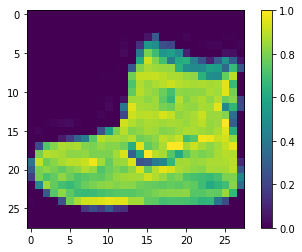

In [21]:
# |?| I don't understand how pyplot works within the memory. Where does it stores the figure object. Is it anonymous?
# |?| Uncommenting the first and last line makes no difference, so why are they needed?

#plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
#plt.show()

In [22]:
# |?| Why trying to plot it again does not work? Is it aware of the cell?
plt.show()

In [23]:
# Scalling the values is important to keeo values between 0 and 1, an importante fact for neural networks
# Since we are working with numpy arrays, vetorial operations are available
train_images = train_images / 255.0 # decimal to transform to float
test_images = test_images / 255.0

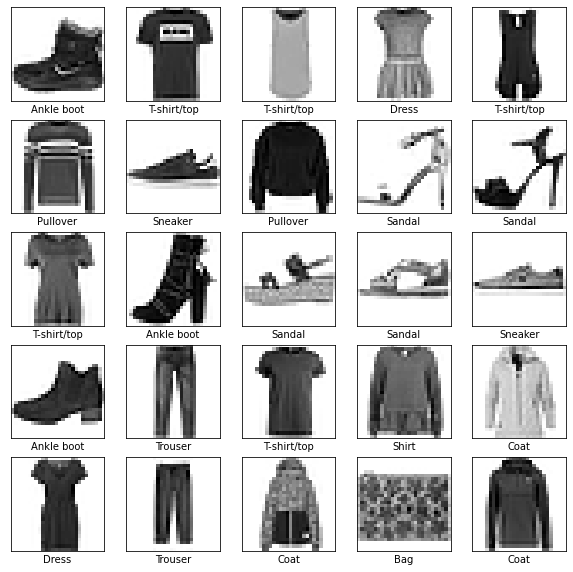

In [24]:
# figsize in inches
plt.figure(figsize=(10,10))
for i in range(25):
    # nrows, ncols, and index. Index is 1 based
    plt.subplot(5,5,i+1)
    
    # determines at which position ticks should be shown for each image.
    # if not defined, ticks will we automatically decided
    plt.xticks([])
    plt.yticks([])
    
    # makes no difference. Why is it here?
    #plt.grid(False)
    
    # imshow: a type of plot: each array position is a "pixels" of the image
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]][1])
plt.show()

## Training the Neural Network

In [25]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dense(units=10)
])
# Flatten: makes 2d array into 1d array to be feed to the NN
# Dense: fully connected NN layer. It has 128 neurons
# |?| But if the flattened image has 784 pixles, wh don't we need more neurons? Isn't it a neuro per input value?
# Last layer: # units == # classes

In [26]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
    )


# the compile method sets configurations for the whole network
# optimizer: the learning algorithm. From the loss result, 
# the optimizer does the backwards step adjusting the weights
# loss: how the error is calculated
# metrics: how success is calculated
# cross entropy is the measure of the difference between two probability distributions
# from_logits makes it return the y_pred in probability distribution
#logits: the pre-probability array

In [27]:
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 22s 359us/sample - loss: 1.1031 - accuracy: 0.6537
Epoch 2/10
60000/60000 [==============================] - 27s 455us/sample - loss: 0.6455 - accuracy: 0.7684
Epoch 3/10
60000/60000 [==============================] - 25s 418us/sample - loss: 0.5707 - accuracy: 0.7965
Epoch 4/10
60000/60000 [==============================] - 36s 594us/sample - loss: 0.5293 - accuracy: 0.8129
Epoch 5/10
60000/60000 [==============================] - 34s 570us/sample - loss: 0.5021 - accuracy: 0.8229
Epoch 6/10
60000/60000 [==============================] - 31s 512us/sample - loss: 0.4823 - accuracy: 0.8300
Epoch 7/10
60000/60000 [==============================] - 28s 460us/sample - loss: 0.4673 - accuracy: 0.8352
Epoch 8/10
60000/60000 [==============================] - 31s 514us/sample - loss: 0.4561 - accuracy: 0.8392
Epoch 9/10
60000/60000 [==============================] - 29s 481us/sample - loss: 0.4467 - accuracy: 0.8

In [28]:
# the accuracy here is the in sample accuracy and is always worse the out of sample accuracy
# That is because the trainin data is seen many times during training, so the model fits to this data
# but the test data may and will have a differente distribution

In [29]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

10000/10000 - 2s - loss: 0.4676 - accuracy: 0.8312


In [30]:
# at this point, the NN has trained weights and we could save those weights to the hard drive to retrieve and
# use them latter, like in another NN.

## Using the trained NN to make predictions

In [31]:
# a new NN is created by adding a softmax to the old NN
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [62]:
test_images.shape

(10000, 28, 28)

In [52]:
# we will use this new NN to make predictions
# |?| Why was the training made without the softmax function?
# we do not need to re-train, apparently
# I guess the logit output was saved, so all we will do is normalize it with softmax

predictions = probability_model.predict(test_images)


# |?| what is the difference between .evaluate and .predict? Is it the parameters?

In [33]:
# inspecting the probabilities assigned to the first image
for tup  in zip(range(10), predictions[0]):
    print(tup)

(0, 9.582036e-07)
(1, 3.658085e-08)
(2, 4.500084e-06)
(3, 5.8537653e-06)
(4, 7.611376e-06)
(5, 0.15440853)
(6, 8.565629e-06)
(7, 0.2816666)
(8, 0.006100799)
(9, 0.55779654)


## Inspecting results

In [49]:
# Utils functions to plot the image and probabilities assigned
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label][1],
                                100*np.max(predictions_array),
                                class_names[true_label][1]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

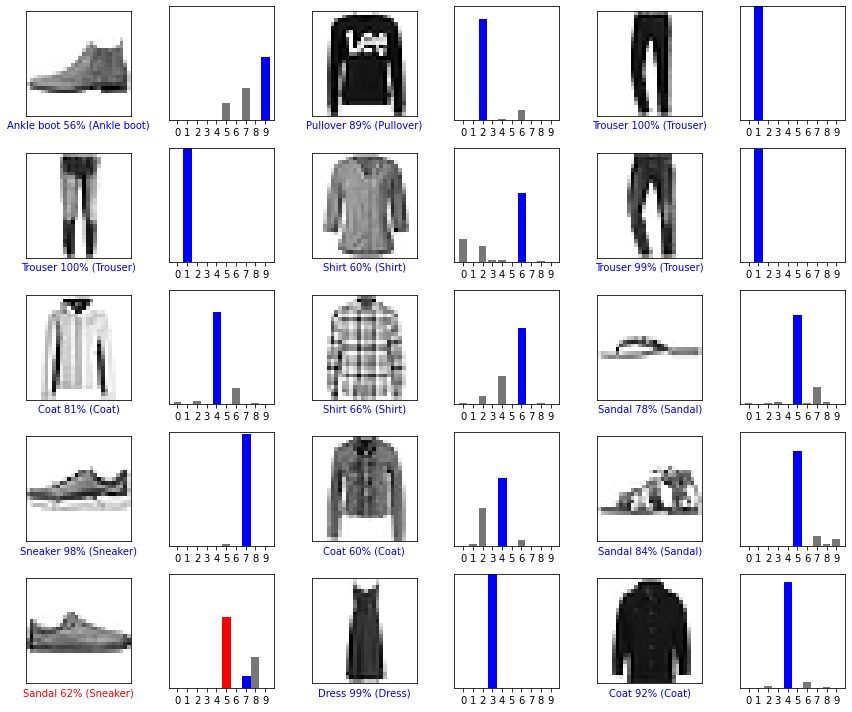

In [50]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))

for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)

plt.tight_layout()
plt.show()

## Use the trained model

In [100]:
img = test_images[1]
img = np.expand_dims(img, 0)

In [101]:
predictions_single = probability_model.predict(img)

In [106]:
predictions_single[0]

array([4.5084322e-04, 6.2904737e-06, 8.9312655e-01, 4.5818906e-05,
       1.4585285e-02, 2.8768149e-10, 9.1639109e-02, 7.6296789e-15,
       1.4613973e-04, 4.1948962e-12], dtype=float32)

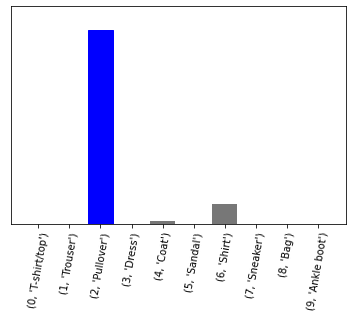

In [108]:
plot_value_array(Which_image, predictions[Which_image], test_labels)
_ = plt.xticks(range(10), class_names, rotation=80)